In [1]:
""" 

NOTE:
REfitting libraries to monkey,

GOal here is for epxloring lib parametrs and refitting to datsets.

"""

' \nGoal, given monkey behavior, fit best MP and score.\n(just single MP)\n\nAlso, try to optimize model, conditions on these programs\n\nNBOTE: here is only extraction of MPs.\nTo score, refit, etc, see stroke_to_MP_loadAnd ...\n\n\nNOTE:\n\n'

In [1]:
import os
# import cv2 # needed to create movie visualization of optimizaiton
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
# from tqdm import tqdm
import imageio
import torch
import torch.distributions as dist

from pybpl.library import Library
from pybpl.model import CharacterModel
from pybpl.objects.concept import CharacterType
from pybpl.objects.part import StrokeType
from pybpl.objects.relation import RelationIndependent, RelationAttachAlong
from pybpl import rendering

# library and type distribution
lib = Library('/data1/code/python/pyBPL/lib_data/', )

### REFIT LIB TO A DATSAET

In [2]:
import pandas as pd
import pickle 
from pythonlib.dataset.dataset import Dataset
from pythonlib.bpl.strokesToProgram import *



In [84]:
# [V2] Give me path by hand (monkey strokes data
from pythonlib.tools.expttools import findPath

animal="Red"
pathlist = findPath("/data2/analyses/database",
         [[animal, "bias"]], return_without_fname=True)



Searching using this string:
/data2/analyses/database/*Red*bias*/**
-- Splitting off dir from fname
Found this many paths:
8
---
/data2/analyses/database/Red-biasdir2-formodeling-210406_014229
---
/data2/analyses/database/Red-biasdir3-formodeling-210406_014249
---
/data2/analyses/database/Red-biasdir3-formodeling-210406_014350
---
/data2/analyses/database/Red-biasdir4-formodeling-210406_014401
---
/data2/analyses/database/Red-biasdir5-formodeling-210406_014421
---
/data2/analyses/database/Red-biasdir6-formodeling-210406_014444
---
/data2/analyses/database/Red-biasdir7_1-formodeling-210406_014458
---
/data2/analyses/database/Red-biasdir7_2-formodeling-210406_014503


In [5]:
D = Dataset(path_list)

----------------
Currently loading: /data2/analyses/database/Pancho-arc2-formodeling-210329_014648
Loaded dataset, size:
5430
Loaded metadat:
{'sketchpad_edges': array([[-327.2, -327.2],
       [ 327.2,  429.6]])}
----
Resetting index
=== CLEANING UP self.Dat ===== 
ORIGINAL: online abort values
too_far_from_ink    260
hotkey_abort         14
Name: online_abort, dtype: int64
kept 5156 out of 5430
removed all cases with online abort not None
Deleted unused columns from self.Dat


In [17]:
D.bpl_load_motorprograms()

Searching using this string:
/data2/analyses/database/Pancho-arc2-formodeling-210329_014648/*infer_MPs_from_strokes*/*params*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/data2/analyses/database/Pancho-arc2-formodeling-210329_014648/infer_MPs_from_strokes-210405_205552


In [13]:
lib.logStart.shape

torch.Size([1212])

In [12]:
torch.log(lib.shape["mixprob"])

torch.Size([1212])

In [14]:
range(len(lib.logStart))

range(0, 1212)

In [19]:
lib.pT

<bound method Library.pT of <pybpl.library.library.Library object at 0x7f22d76dd4d0>>

====== DOING prim_type_mixture
-- Extracted these counts:
[0, 2, 3, 7, 10, 11, 15, 17, 19, 20, 21, 22, 25, 27, 28, 29, 32, 39, 40, 43, 45, 47, 52, 53, 59, 63, 65, 67, 70, 73, 74, 75, 76, 79, 84, 86, 87, 88, 91, 94, 95, 96, 99, 103, 110, 111, 113, 114, 116, 117, 118, 124, 125, 129, 130, 134, 135, 139, 144, 146, 148, 149, 157, 160, 162, 170, 171, 175, 180, 188, 190, 195, 197, 208, 211, 214, 218, 221, 222, 223, 226, 227, 229, 231, 233, 243, 247, 248, 250, 255, 260, 263, 266, 277, 282, 286, 287, 290, 293, 294, 296, 298, 304, 307, 310, 319, 321, 340, 345, 346, 348, 350, 354, 365, 366, 376, 387, 389, 391, 392, 393, 397, 400, 410, 416, 420, 452, 473, 475, 476, 483, 489, 492, 497, 504, 508, 522, 523, 525, 528, 534, 542, 551, 553, 554, 556, 566, 574, 576, 589, 597, 598, 603, 605, 606, 610, 614, 634, 638, 641, 642, 643, 652, 653, 657, 662, 681, 686, 690, 698, 710, 711, 713, 716, 717, 723, 732, 747, 774, 777, 781, 789, 794, 815, 817, 822, 844, 851, 853, 856, 874, 876, 881, 883, 886, 890, 893, 896

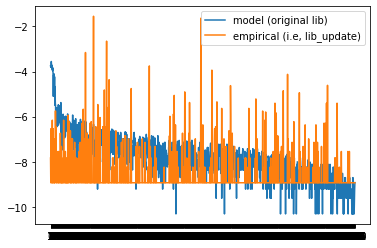

In [18]:
from pythonlib.bpl.refitting import libRefitted

MPlist_flat = list(D.Dat["motor_program"].values)
libRefitted(MPlist_flat, params_to_update=["prim_type_mixture"])

In [32]:
torch.sum(torch.exp(lib.logT[0]))

tensor(1.0000)

In [37]:
lib.logStart.shape

torch.Size([1212])

In [47]:
torch.sum(torch.exp(lib.logStart))

tensor(1.0000)

In [53]:
tmp = lib.logStart.reshape(1,-1).repeat(len(lib.logStart), 1)

torch.sum(torch.exp(tmp[100]))

tensor(1.0000)

In [58]:
tmp.shape
lib.logT.shape

torch.Size([1212, 1212])

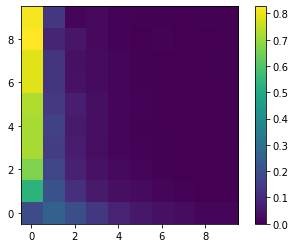

In [63]:
plt.figure()
plt.imshow(lib.pmat_nsub, origin="lower")
plt.colorbar()

In [75]:
tmp = lib.pmat_nsub[0].repeat((10,1))
tmp[1].shape




torch.Size([10])

In [80]:
lib.scale["theta"].shape

torch.Size([1212, 2])